Importation des bibliothèqeus

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
df=pd.read_csv('../data/processed/df_encoded.csv', sep="\t", encoding="latin1")

In [3]:
df

,Date,Heures,Prévision J,Prévision J-1,Consommation,Weekend,Heure,Mois,Jour_du_mois,Semaine,...,Jour_Mercredi,Jour_Samedi,Jour_Vendredi,Saison_Automne,Saison_Hiver,Saison_Printemps,Saison_Été,Type de jour TEMPO_BLANC,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE
0,2014-09-01,00:00,42500.0,42600.0,43320.0,0,0,9,1,36,...,False,False,False,True,False,False,False,False,True,False
1,2014-09-01,00:30,40300.0,40300.0,41174.0,0,0,9,1,36,...,False,False,False,True,False,False,False,False,True,False
2,2014-09-01,01:00,38000.0,37800.0,38430.0,0,1,9,1,36,...,False,False,False,True,False,False,False,False,True,False
3,2014-09-01,01:30,38300.0,37800.0,37800.0,0,1,9,1,36,...,False,False,False,True,False,False,False,False,True,False
4,2014-09-01,02:00,37400.0,37400.0,37137.0,0,2,9,1,36,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224251,2025-04-24,22:45,48348.0,48450.0,48824.0,0,22,4,24,17,...,False,False,False,False,False,True,False,False,True,False
224252,2025-04-24,23:00,48961.0,49000.0,48320.0,0,23,4,24,17,...,False,False,False,False,False,True,False,False,True,False
224253,2025-04-24,23:15,48478.0,48700.0,48274.0,0,23,4,24,17,...,False,False,False,False,False,True,False,False,True,False
224254,2025-04-24,23:30,47995.0,48400.0,47519.0,0,23,4,24,17,...,False,False,False,False,False,True,False,False,True,False


# 1 er scenario : sans les colonnes de prévisions 

In [4]:
# 4. Définition des variables
X = df.drop(columns=["Prévision J", "Prévision J-1", "Consommation", "Date", "Heures"])
y = df["Consommation"]

In [5]:
# 5. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# 6. Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:

# 7. Modèle KNN
knn = KNeighborsRegressor(n_neighbors=5)  # Tu peux changer k ici
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [8]:
# 8. Prédiction
y_pred = knn.predict(X_test_scaled)
y_pred

array([57673.4, 64967.6, 47566.6, ..., 42898.6, 58558.6, 47386.6],
      shape=(44852,))

In [9]:

# 9. Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

r2 = r2_score(y_test, y_pred)

print("Résultats KNN (k=5) sans prévisions :")
print(f"MAE  : {mae:.2f} MW")
print(f"RMSE : {rmse:.2f} MW")
print(f"R²   : {r2:.3f}")

Résultats KNN (k=5) sans prévisions :
MAE  : 2820.62 MW
RMSE : 3860.15 MW
R²   : 0.884


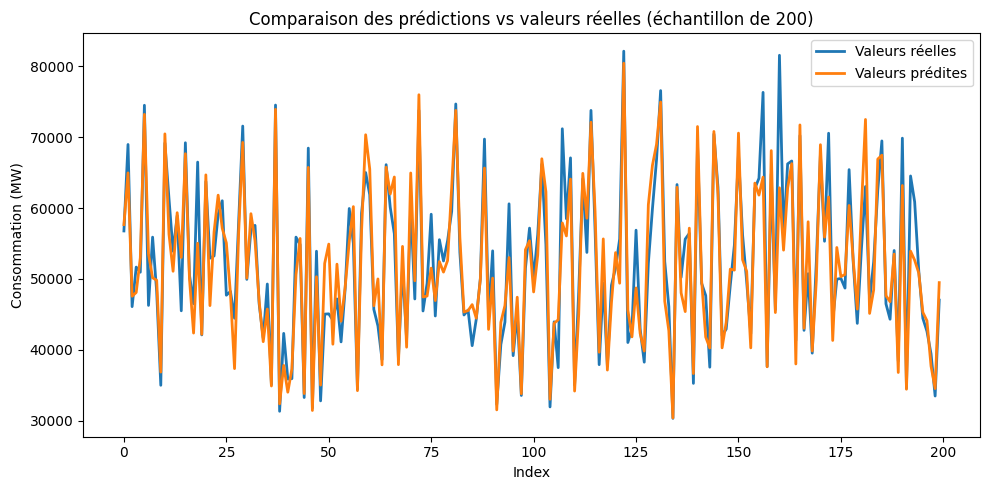

In [10]:
import matplotlib.pyplot as plt

# 10. Visualisation des valeurs réelles vs prédites
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label='Valeurs réelles', linewidth=2)
plt.plot(y_pred[:200], label='Valeurs prédites', linewidth=2)
plt.title("Comparaison des prédictions vs valeurs réelles (échantillon de 200)")
plt.xlabel("Index")
plt.ylabel("Consommation (MW)")
plt.legend()
plt.tight_layout()
plt.show()
